待办:
- [x] 设置主题为暗色主题/自己做一个不要有亮色的`colormap`/给`stemline`加上极细的轮廓线
- [ ] 转换坐标轴位置/自己hack一个坐标轴 (abandon)
- [ ] 如果分类少，可以在涂上添加标注(abandon)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data/COMPOSED.csv")
df.set_index("Country",inplace=True)
# 数据标准化，为了计算final_score
df.apply(lambda col: list(map(lambda x: (x- col.mean())/col.std(),col)), axis=0)
df.reset_index(inplace=True)
final_score = df["complex_HH"] * 0.35 + df["complex_PRIV"] * 0.65

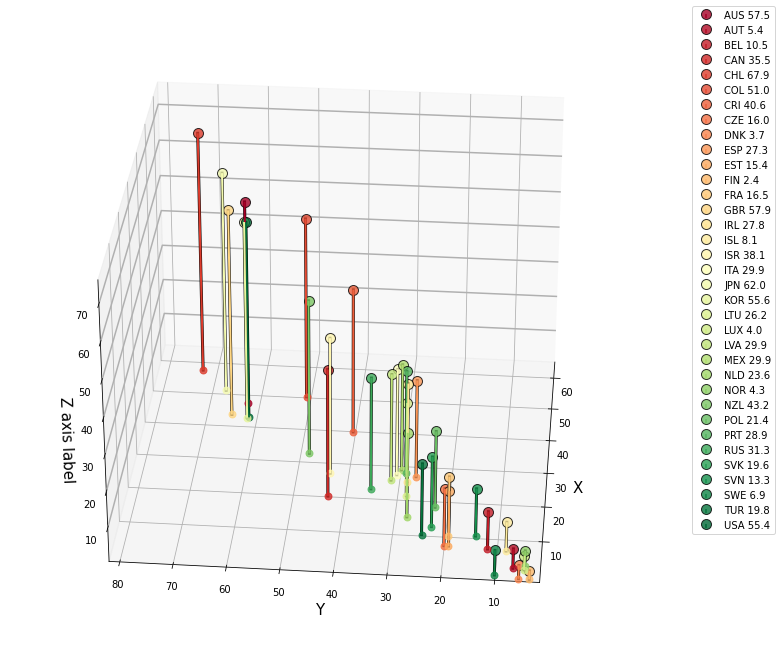

In [91]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection="3d")

cmap = plt.get_cmap("RdYlGn")
colors = [cmap(i) for i in np.linspace(0,1,len(df.index))]
X = df["complex_HH"]
Y = df["complex_PRIV"]
Z = final_score
labels = list(map(lambda x: " ".join(x),zip(df["Country"],map(lambda x: str(round(x,1)),Z))))

for i in range(len(df.index)):
    color = [x for x in colors[i]]
    color[-1] = .8 # set alpha

    # 由于有些颜色太亮，需要加上轮廓线，这里hack出stemlines的轮廓线
    ax.plot([X[i],X[i]],[Y[i],Y[i]],[0,Z[i]],**dict(color='black', linewidth=3))

    markerline, stemlines, baseline = ax.stem(x=[X[i]],y=[Y[i]],z=[Z[i]],label=labels[i]) # 注意x,y,z传入的要是可迭代对象

    # 画出底盘
    ax.scatter(X[i],Y[i],zs=0,zdir="z",c=[color],s=48,alpha=.8)

    plt.setp(stemlines,color=colors[i],lw=2) # 完全不透明,遮住后面的黑色线
    # plt.setp(stemlines,"color",(0,0,0,.7))
    plt.setp(markerline,color=color,markersize=10,markeredgewidth=1,markeredgecolor=(0,0,0,.8))
    plt.setp(baseline,"color",(0,0,0,0))



# Set limits of the plot from coord limits
xmin, xmax = X.min() * 0.9, X.max() * 1.1
ymin, ymax = Y.min() * 0.9, Y.max() * 1.1
zmin, zmax = Z.min() * 0.9, Z.max() * 1.1
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
# edges_kw = dict(color='black', linewidth=1.4, zorder=1e3)
# ax.plot([xmin, xmin], [ymin, ymax], 0, **edges_kw)
# ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
# ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)


ax.set_xlabel("X" , fontsize=15)
ax.set_ylabel("Y", fontsize=15) 
ax.set_zlabel("Z axis label" , fontsize=15)

ax.view_init(30,185)
ax.zaxis._axinfo["grid"].update({"linewidth":1.5})
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0.)